In [140]:
library(ggplot2)
library(ISLR)
library(tree)
library(randomForest)
library(gbm)
library(glmnet)
library(dplyr)
library(tidyverse)
#resource R publication https://rpubs.com/ppaquay/65564

In [32]:
#install.packages('gbm')

## Q3

Warning message:
"Ignoring unknown aesthetics: lable"
Warning message:
"Removed 2 rows containing missing values (geom_point)."


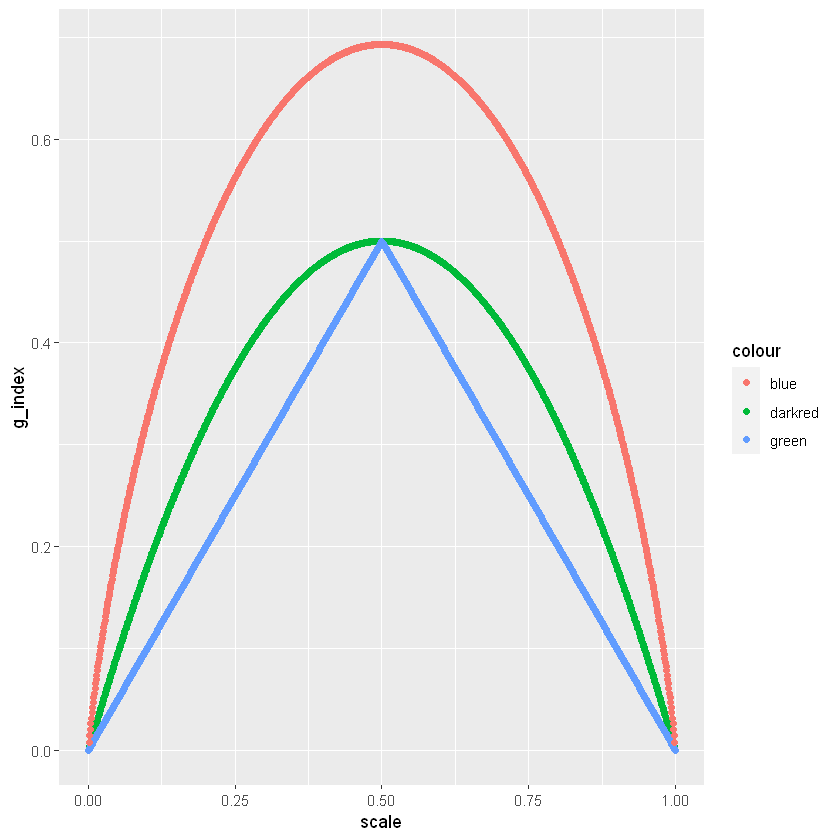

In [22]:
scale <- seq(0, 1, 0.001)
g_index <- 2 * scale * (1 - scale)
error <- 1 - pmax(scale, 1 - scale)
entropy <- - (scale * log(scale) + (1 - scale) * log(1 - scale))


data<-data.frame(scale,g_index,error,entropy)
ggplot(data,aes(x=scale))+
geom_point(aes(y=g_index,color = "darkred"))+
geom_point(aes(y=error,color='green',lable='Error'))+
geom_point(aes(y=entropy,color='blue'))

## Q5

In [26]:
p_red=c(0.1,0.15,0.2,0.2,0.55,0.6,0.6,0.65,0.7,0.75)
red_pop<-0
green_pop<-0
for (i in p_red){
    if (i>=0.5){
        red_pop=red_pop+1
    }else{
        green_pop=green_pop+1
    }
}
if(red_pop>green_pop){
    print('majority is Red')
}else{
    print('majority is green')
}

[1] "majority is Red"


In [27]:
avg=mean(p_red)
if(avg>=0.5){
    print('majority is Red')
}else{
    print('majority is green')
}

[1] "majority is green"


## Q8 

In [33]:
#part a
set.seed(613)
index <- sample(1:nrow(Carseats), nrow(Carseats)*2 / 3)
train <- Carseats[index, ]
test <- Carseats[-index, ]


Regression tree:
tree(formula = Sales ~ ., data = train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "Advertising" "CompPrice"  
Number of terminal nodes:  16 
Residual mean deviance:  2.38 = 594.9 / 250 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.58300 -0.94340 -0.02411  0.00000  0.94230  4.11300 

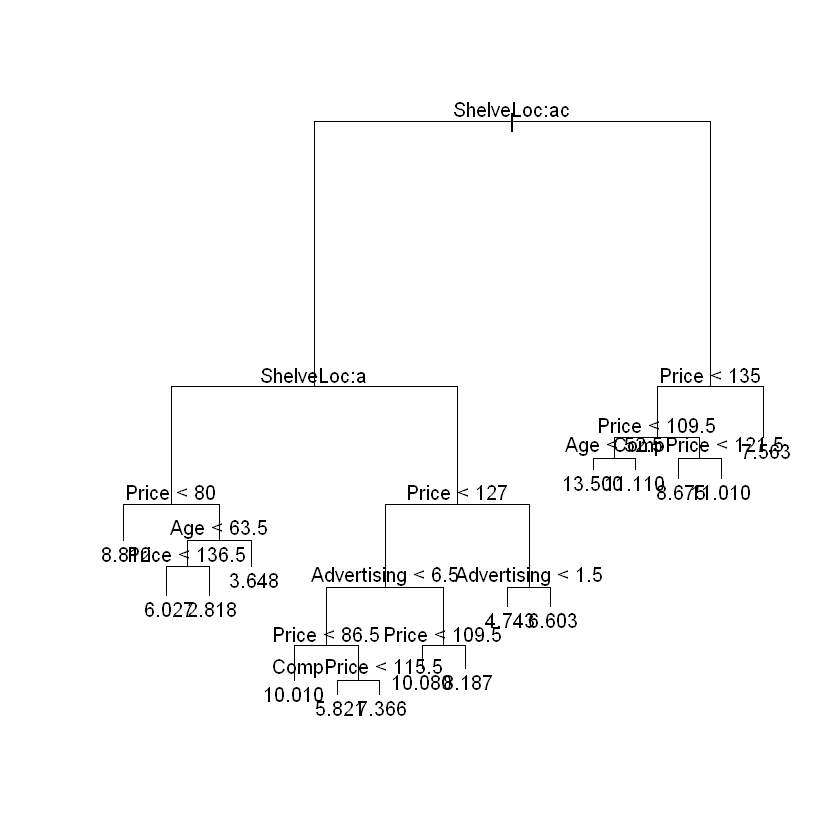

In [41]:
#part b
TM <- tree(Sales ~ ., data = train)
summary(TM)
plot(TM)
text(TM)

In [42]:
#prediction and interpretation
results <- predict(TM, newdata = test)
MSE<-mean((results - test$Sales)^2)
print(MSE)

[1] 5.155348


Test MSE is high, the model need improvement, maybe we need to reduce or increase the leafs

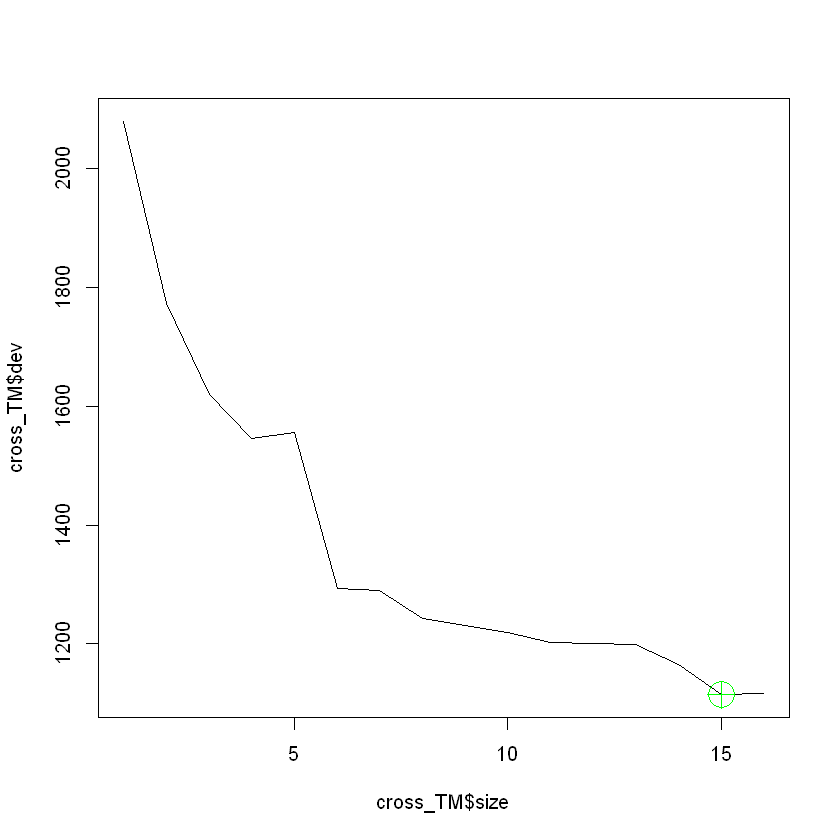

In [62]:
#part c
set.seed(613)
cross_TM <- cv.tree(TM)
plot(cross_TM$size, cross_TM$dev, type = "l")
dev_min <- which.min(cross_TM$dev)
points(cross_TM$size[dev_min], cross_TM$dev[dev_min], col = "green", cex = 3, pch = 10)

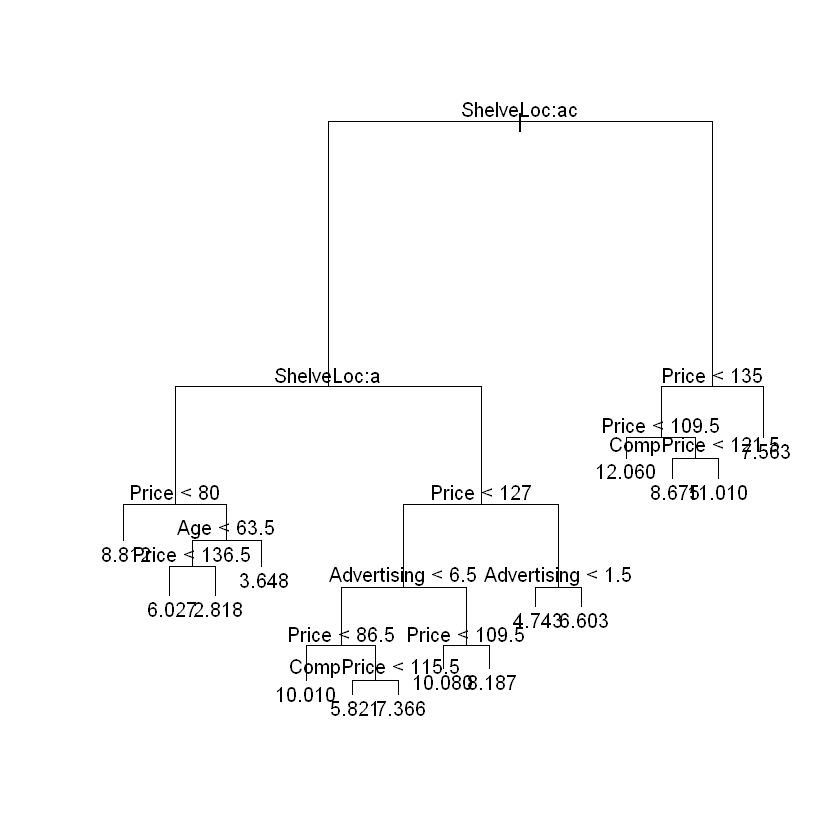

In [64]:
prune_TM <- prune.tree(TM, best = 15)
plot(prune_TM)
text(prune_TM)

In [65]:
#prediction and interpretation
results <- predict(prune_TM, newdata = test)
MSE<-mean((results - test$Sales)^2)
print(MSE)

[1] 5.06778


pruning the tree decreesed the MSE

In [90]:
#part d
#baging all variables = 10
set.seed(613)
RF <- randomForest(Sales ~ ., data = train, mtry = 10, ntree = 500, importance = TRUE)
resuts <- predict(RF, newdata = test)
MSE<-mean((resuts - test$Sales)^2)
print(MSE)

[1] 2.660909


In [91]:
importance(RF)

,%IncMSE,IncNodePurity
CompPrice,28.0742761,204.926804
Income,5.8910276,95.382447
Advertising,25.9399862,219.431849
Population,-0.3523935,71.917322
Price,53.1266553,509.191506
ShelveLoc,65.7175251,652.794003
Age,16.5327626,169.998041
Education,4.6524452,65.568670
Urban,-2.5972062,8.328801
US,4.2832741,10.397882


In [92]:
#part e
#baging m=p**(1/2) = 3 
set.seed(613)
RF <- randomForest(Sales ~ ., data = train, mtry = 3, ntree = 500, importance = TRUE)
resuts <- predict(RF, newdata = test)
MSE<-mean((resuts - test$Sales)^2)
print(MSE)

[1] 3.148037


In [93]:
importance(RF)

,%IncMSE,IncNodePurity
CompPrice,15.1543762,202.85417
Income,3.6619599,137.73499
Advertising,19.6510249,239.88248
Population,-0.1440700,135.14866
Price,34.4874669,406.25704
ShelveLoc,40.9334582,478.72870
Age,11.6581056,208.20549
Education,0.9082418,82.64943
Urban,-1.9272708,19.12418
US,6.1734451,35.56425


##  Q9

In [97]:
set.seed(613)
index  <- sample(1:nrow(OJ), 800)
train <- OJ[index, ]
test <- OJ[-index, ]

In [98]:
MT <- tree(Purchase ~ ., data = train)
summary(MT)


Classification tree:
tree(formula = Purchase ~ ., data = train)
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff"
Number of terminal nodes:  8 
Residual mean deviance:  0.759 = 601.1 / 792 
Misclassification error rate: 0.1688 = 135 / 800 

In [99]:
MT

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1071.00 CH ( 0.60875 0.39125 )  
   2) LoyalCH < 0.50395 356  426.50 MM ( 0.28652 0.71348 )  
     4) LoyalCH < 0.276142 170  123.20 MM ( 0.11765 0.88235 )  
       8) LoyalCH < 0.0356415 59   10.14 MM ( 0.01695 0.98305 ) *
       9) LoyalCH > 0.0356415 111  101.60 MM ( 0.17117 0.82883 ) *
     5) LoyalCH > 0.276142 186  255.20 MM ( 0.44086 0.55914 )  
      10) PriceDiff < 0.05 73   79.24 MM ( 0.23288 0.76712 ) *
      11) PriceDiff > 0.05 113  154.10 CH ( 0.57522 0.42478 ) *
   3) LoyalCH > 0.50395 444  347.90 CH ( 0.86712 0.13288 )  
     6) PriceDiff < -0.39 29   37.36 MM ( 0.34483 0.65517 ) *
     7) PriceDiff > -0.39 415  263.20 CH ( 0.90361 0.09639 )  
      14) LoyalCH < 0.705326 135  140.50 CH ( 0.78519 0.21481 )  
        28) PriceDiff < 0.265 71   90.84 CH ( 0.66197 0.33803 ) *
        29) PriceDiff > 0.265 64   35.09 CH ( 0.92188 0.07812 ) *
      15) LoyalCH > 0.705326 280   92.77 CH ( 0.9

node 9, is a terminal node. The split criterion is LoyalCH < 0.035, the number of observations in that branch is 111 with a deviance of 101.60 and an overall prediction for the branch of MM. More than 17% of the observations in that branch take the value of CH, and the remaining 82% take the value of MM.

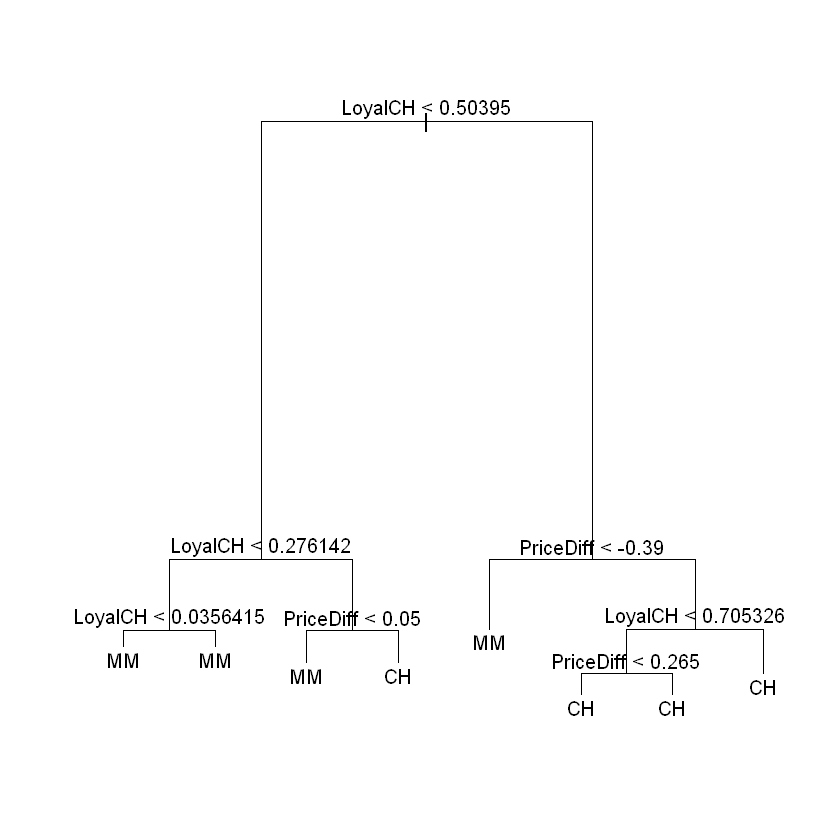

In [100]:
plot(MT)
text(MT)

Most important indicator of sale is LoyalCH and after that priceDiff


In [110]:
predict <- predict(MT, test, type = "class")
T<-table(predict, test$Purchase)
TP=T[1,1]
FP=T[1,2]
FN=T[2,1]
TN=T[2,2]
R=(TP+TN)/(TP+FP+FN+TN)
Test_eror_rate=1-R
Test_eror_rate

[1] 0.1740741

In [111]:
#part f

CVM <- cv.tree(MT, FUN = prune.misclass)
CVM

$size
[1] 8 5 3 2 1

$dev
[1] 146 146 169 169 313

$k
[1]  -Inf   0.0   8.5   9.0 152.0

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

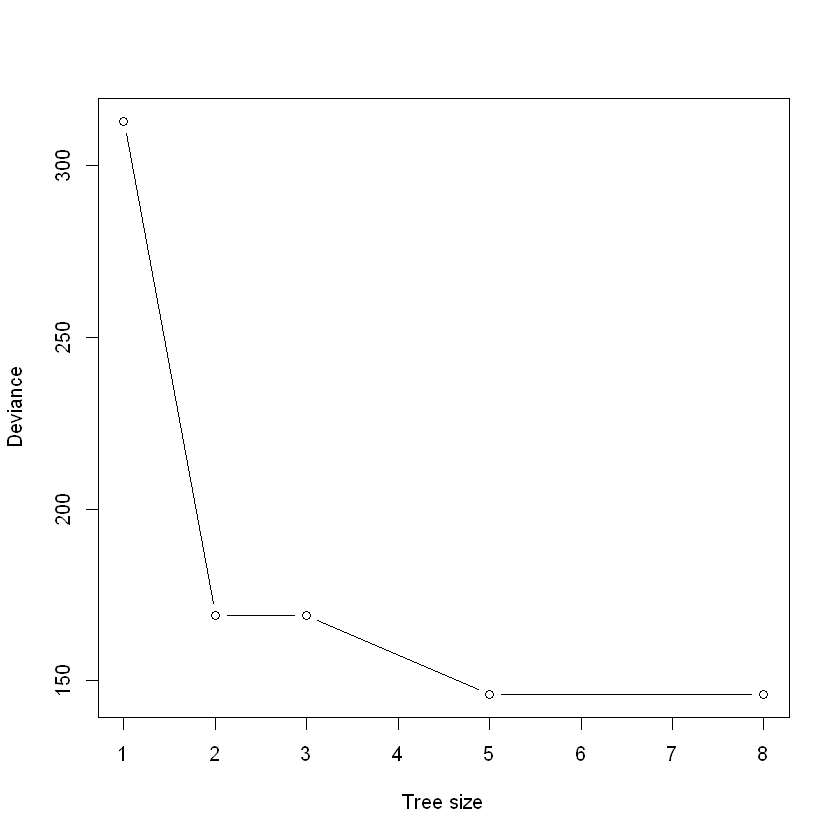

In [113]:
#part g
plot(CVM$size, CVM$dev, type = "b", xlab = "Tree size", ylab = "Deviance")

part h: 5 is the smallest size of tree with lowest error

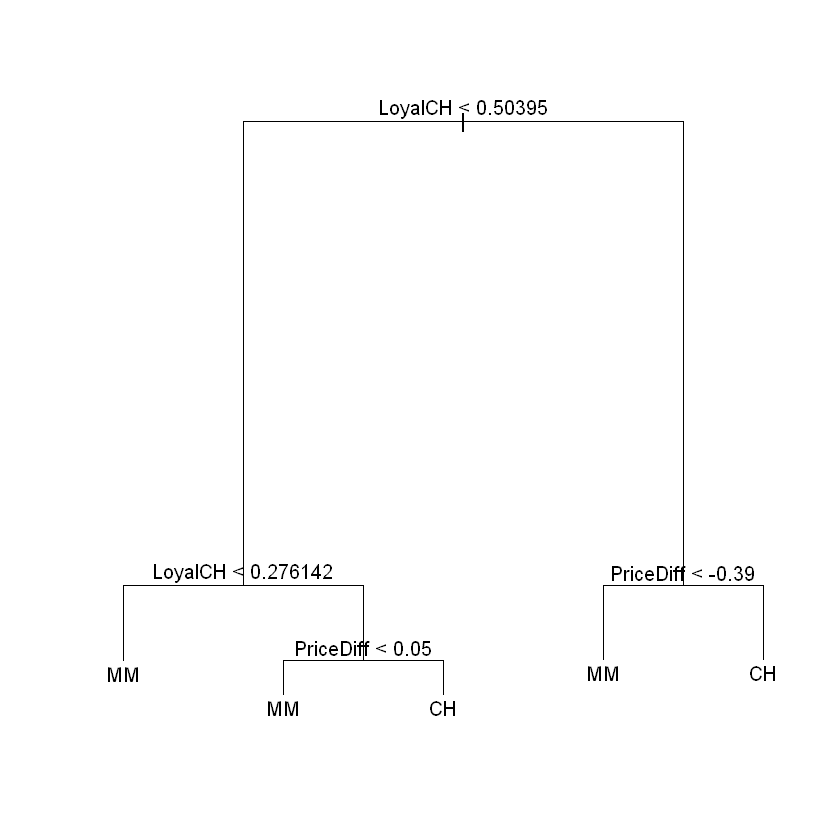

In [114]:
#part i
PM <- prune.misclass(MT, best = 5)
plot(PM)
text(PM)

In [115]:
#part j
summary(MT)


Classification tree:
tree(formula = Purchase ~ ., data = train)
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff"
Number of terminal nodes:  8 
Residual mean deviance:  0.759 = 601.1 / 792 
Misclassification error rate: 0.1688 = 135 / 800 

In [116]:
summary(PM)


Classification tree:
snip.tree(tree = MT, nodes = c(4L, 7L))
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff"
Number of terminal nodes:  5 
Residual mean deviance:  0.8264 = 657 / 795 
Misclassification error rate: 0.1688 = 135 / 800 

both trees have same miss clasification error but the residual mean deviation of prune tree is higher

In [117]:
#part K
predict <- predict(PM, test, type = "class")
T<-table(predict, test$Purchase)
TP=T[1,1]
FP=T[1,2]
FN=T[2,1]
TN=T[2,2]
R=(TP+TN)/(TP+FP+FN+TN)
Test_eror_rate=1-R
Test_eror_rate

[1] 0.1740741

Test eror of both model are same

## Q10

In [120]:
#part a
Hit<-Hitters%>%drop_na(Salary)%>%mutate(Salary=log(Salary))

In [121]:
#part b
train<-Hit[1:200,]
test<-Hit[201:length(Hit),]

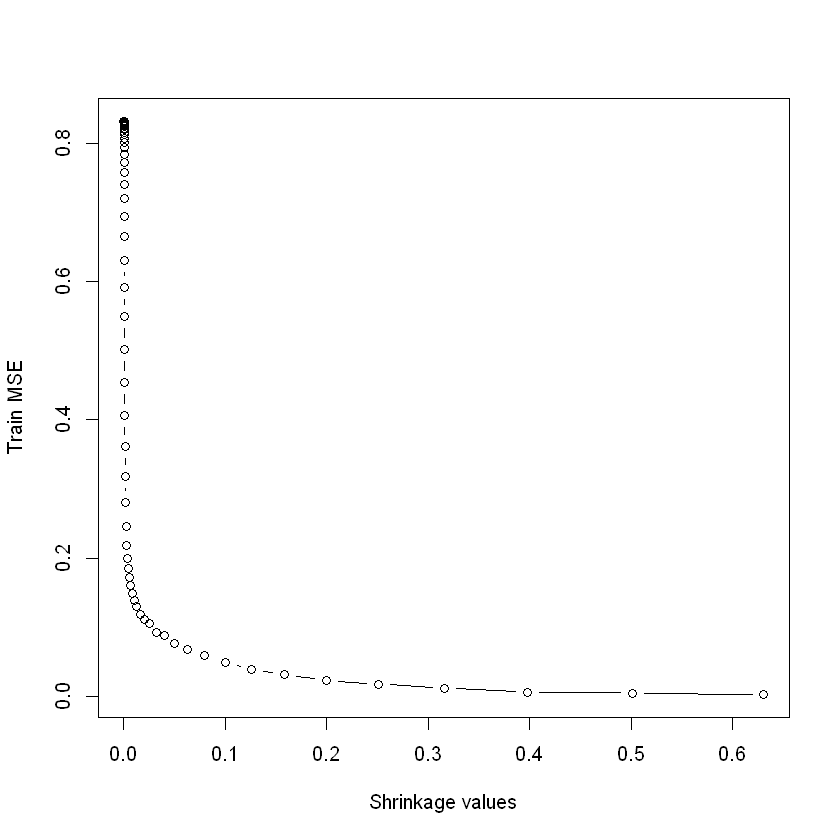

In [136]:
#part c
set.seed(613)
rang <- seq(-10, -0.2, by = 0.1)
lambdas <- 10^rang
MSE <- rep(NA, length(rang))
for (i in 1:length(rang)) {
    GBMM <- gbm(Salary ~ ., data = train, distribution = "gaussian", n.trees = 1000, shrinkage = lambdas[i])
    prediction <- predict(GBMM, train, n.trees = 1000)
    MSE[i] <- mean((prediction - train$Salary)^2)
}
plot(lambdas, MSE, type = "b", xlab = "Shrinkage values", ylab = "Train MSE")

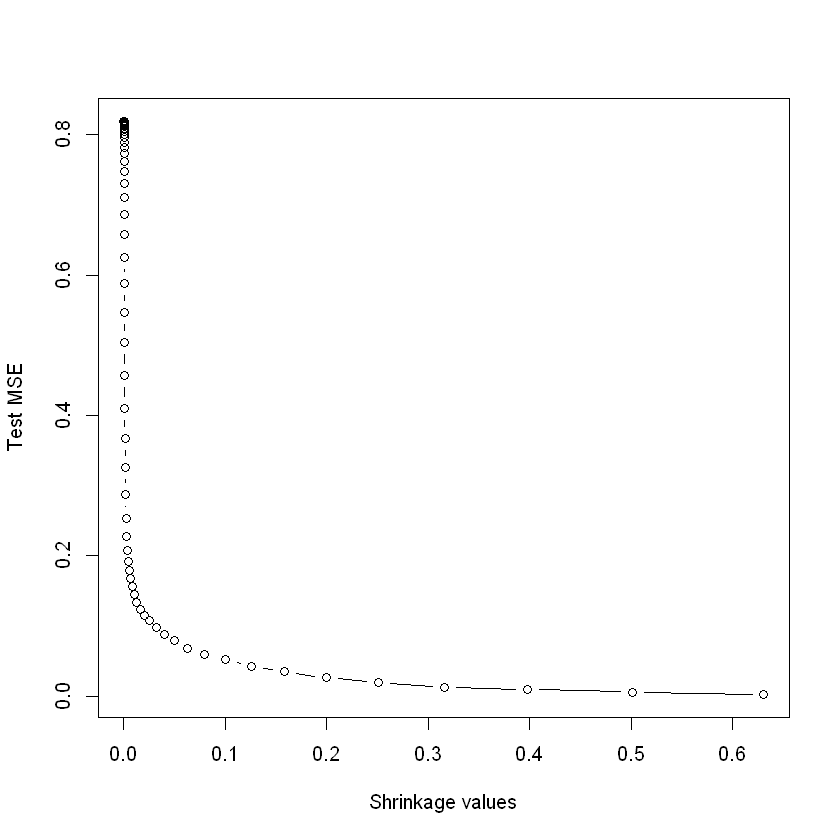

In [137]:
MSE <- rep(NA, length(rang))
for (i in 1:length(rang)) {
    GBMM <- gbm(Salary ~ ., data = train, distribution = "gaussian", n.trees = 1000, shrinkage = lambdas[i])
    prediction <- predict(GBMM, test, n.trees = 1000)
    MSE[i] <- mean((prediction - test$Salary)^2)
}
plot(lambdas, MSE, type = "b", xlab = "Shrinkage values", ylab = "Test MSE")

In [135]:
print(min(MSE))
print(lambdas[which.min(MSE)])

[1] 0.003040368
[1] 0.6309573


In [138]:
#part e
MLM <- lm(Salary ~ ., data = train)
prediction <- predict(MLM, test)
MLM_EROR<-mean((prediction - test$Salary)^2)
MLM_EROR

[1] 0.3196129

In [139]:
X_train <- model.matrix(Salary ~ ., data = train)
X_test <- model.matrix(Salary ~ ., data = test)
y_train <- train$Salary
MGL <- glmnet(X_train, y_train, alpha = 0)
prediction <- predict(MGL, s = 0.01, newx = X_test)
MGL_ERROR<-mean((prediction - test$Salary)^2)
MGL_ERROR

[1] 0.3359583

The test MSE for boosting is higher than for linear regression and ridge regression.

,var,rel.inf
,<chr>,<dbl>
CAtBat,CAtBat,17.5221686
PutOuts,PutOuts,11.0594241
Walks,Walks,8.3423136
CRuns,CRuns,8.3208138
AtBat,AtBat,7.0349647
RBI,RBI,6.2932994
Runs,Runs,5.9513576
Assists,Assists,5.1605260
HmRun,HmRun,4.9257088


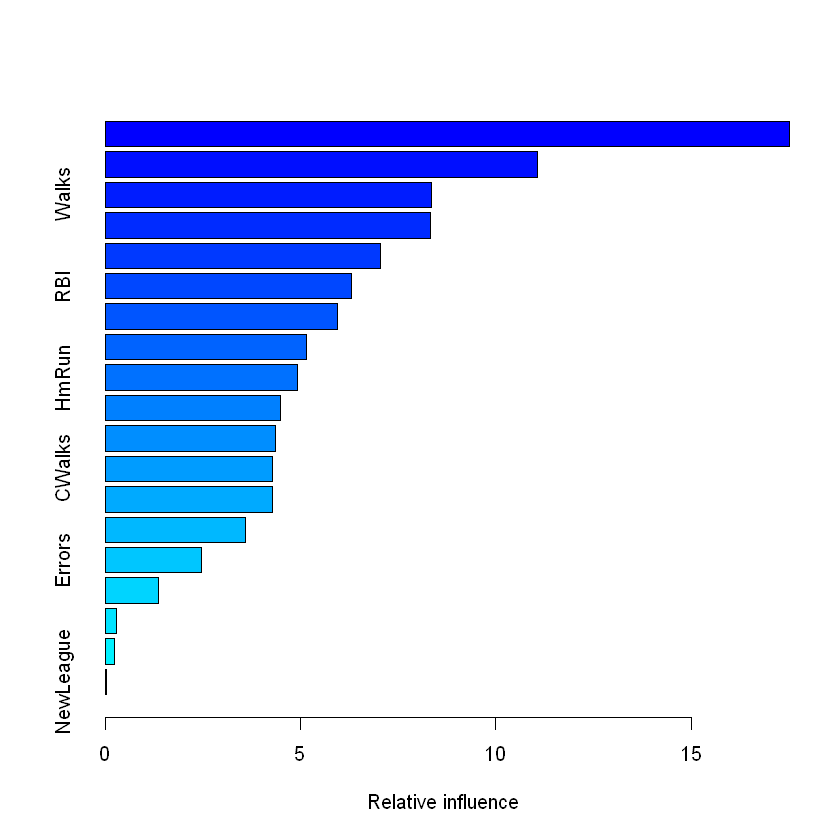

In [144]:
#part f
BH <- gbm(Salary ~ ., data = train, distribution = "gaussian", n.trees = 1000, shrinkage = lambdas[which.min(MSE)])
summary(BH)

In [143]:
#part g
set.seed(613)
BG <- randomForest(Salary ~ ., data = train, mtry = 19, ntree = 500)
prediction <- predict(BG, test)
BG_ERROR<-mean((prediction - test$Salary)^2)
BG_ERROR

[1] 0.03637854